# Data Wrangling & EDA of Home Credit Default Risk Datasets

## 1. Load the Data

The data used for this project is from a Kaggle competition for Home Credit default risk and can be accessed [here](https://www.kaggle.com/c/home-credit-default-risk/data). There are 7 source files containing data related to each applicant:
- application_{train|test}.csv
- bureau.csv
- bureau_balance.csv
- credit_card_balance.csv
- installments_payments.csv
- POS_CASH_balance.csv
- previous_application.csv

For the scope of this project, I will only be using 2 files:
- application_{train|test}.csv
- bureau.csv



### 1.1 Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from sklearn.impute import SimpleImputer

import warnings
import gc

warnings.filterwarnings('ignore')

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### 1.2 Load the Data

In [5]:
#Read in the data from the 7 source files into 7 dataframes
df_application = pd.read_csv('data/application_train.csv', encoding= 'unicode_escape')
df_bureau = pd.read_csv('data/bureau.csv', encoding= 'unicode_escape')


### 1.3 Explore the Data

In [6]:
#print the shape of each dataframe
print('Application_train Data: ', df_application.shape)
print('Bureau Data: ', df_bureau.shape)

Application_train Data:  (307511, 122)
Bureau Data:  (1716428, 17)


In [7]:
print(df_application.info())
print(df_application.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION          

The data types for df_application are appropriate for the data each column is holding, therefore nothing needs to be done for this part.  All the categories are of type 'object' and numerical values are floats and ints.

In [60]:
df_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [61]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,nan,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,nan,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,nan,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.56,0.73,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

In [8]:
df_application.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.00,278180.52,102790.18,100002.00,189145.50,278202.00,367142.50,456255.00
TARGET,307511.00,0.08,0.27,0.00,0.00,0.00,0.00,1.00
CNT_CHILDREN,307511.00,0.42,0.72,0.00,0.00,0.00,1.00,19.00
AMT_INCOME_TOTAL,307511.00,168797.92,237123.15,25650.00,112500.00,147150.00,202500.00,117000000.00
AMT_CREDIT,307511.00,599026.00,402490.78,45000.00,270000.00,513531.00,808650.00,4050000.00
AMT_ANNUITY,307499.00,27108.57,14493.74,1615.50,16524.00,24903.00,34596.00,258025.50
AMT_GOODS_PRICE,307233.00,538396.21,369446.46,40500.00,238500.00,450000.00,679500.00,4050000.00
REGION_POPULATION_RELATIVE,307511.00,0.02,0.01,0.00,0.01,0.02,0.03,0.07
DAYS_BIRTH,307511.00,-16037.00,4363.99,-25229.00,-19682.00,-15750.00,-12413.00,-7489.00
DAYS_EMPLOYED,307511.00,63815.05,141275.77,-17912.00,-2760.00,-1213.00,-289.00,365243.00


From the data above we can confirm that some of the features do contain outliers:
 - CNT_CHILDREN = 19 
 - DAYS_EMPLOYED max = 365243.00
 - OWN_CAR_AGE = 91.0
 
We can also see that the age, and other features representing number of years are represented in negative number of days

## 1.4 Missing Values

In the following section, the data will be analyzed to check for missing values.

In [9]:
#count missing values in each column and sort them
def countMissing(df):
    missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
    missing.columns=['count', '%']
    return missing.sort_values(by='count', ascending=False)
    
countMissing(df_application).head(50)

,count,%
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35


The count of missing values above is showing there are 49 columns with 47% to 70% missing values.  The columns above were analyzed and using common sense and my general knowledge when applying for a loan or credit card, financial insitutions don't require this type of information.  But for verification purposes I checked with a mortgage specialist and confirmed that this data is not required.  However, occupation type is a requirement therefore I will keep it in the dataframe (it has 31% missing values).

## 1.5 Convert days columns  to years

Use describe() on the all the days columns to check the changes that need to be made.

In [14]:
#check the DAYS_BIRTH colum before making changes
df_application[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.00,307511.00,307511.00,307511.00,307510.00
mean,-16037.00,63815.05,-4986.12,-2994.20,-962.86
std,4363.99,141275.77,3522.89,1509.45,826.81
min,-25229.00,-17912.00,-24672.00,-7197.00,-4292.00
25%,-19682.00,-2760.00,-7479.50,-4299.00,-1570.00
50%,-15750.00,-1213.00,-4504.00,-3254.00,-757.00
75%,-12413.00,-289.00,-2010.00,-1720.00,-274.00
max,-7489.00,365243.00,0.00,0.00,0.00


In [15]:
#convert negative days to absolute number of years for all days columns 
#rename columns names to reflect that they are in 'years' instead of 'days'
df_application['DAYS_BIRTH'] = abs((df_application['DAYS_BIRTH']/365)).astype(int)
df_application['DAYS_EMPLOYED'] = abs(round((df_application['DAYS_EMPLOYED']/365),1))
df_application['DAYS_REGISTRATION'] = abs(round((df_application['DAYS_REGISTRATION']/365),1))
df_application['DAYS_ID_PUBLISH'] = abs(round((df_application['DAYS_ID_PUBLISH']/365),1))
df_application['DAYS_LAST_PHONE_CHANGE'] = abs(round((df_application['DAYS_LAST_PHONE_CHANGE']/365), 1))

df_application.rename({'DAYS_BIRTH':'AGE'}, axis=1, inplace=True)
df_application.rename({'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, axis=1, inplace=True)
df_application.rename({'DAYS_REGISTRATION':'YEARS_REGISTRATION'}, axis=1, inplace=True)
df_application.rename({'DAYS_ID_PUBLISH': 'YEARS_ID_PUBLISH'}, axis=1, inplace=True) 
df_application.rename({'DAYS_LAST_PHONE_CHANGE':'YEARS_PHONE_CHANGE'}, axis=1, inplace=True)



In [16]:
df_application[['AGE','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH','YEARS_PHONE_CHANGE']].describe()

,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_PHONE_CHANGE
count,307511.00,307511.00,307511.00,307511.00,307510.00
mean,43.44,185.55,13.66,8.20,2.64
std,11.95,382.05,9.65,4.14,2.27
min,20.00,0.00,0.00,0.00,0.00
25%,34.00,2.60,5.50,4.70,0.80
50%,43.00,6.10,12.30,8.90,2.10
75%,53.00,15.60,20.50,11.80,4.30
max,69.00,1000.70,67.60,19.70,11.80


In [17]:
df_application[['YEARS_EMPLOYED']].describe()

,YEARS_EMPLOYED
count,307511.00
mean,185.55
std,382.05
min,0.00
25%,2.60
50%,6.10
75%,15.60
max,1000.70


In [18]:
(df_application['YEARS_EMPLOYED'] == 1000.7).value_counts()

False    252137
True      55374
Name: YEARS_EMPLOYED, dtype: int64

There are 55374 rows where the YEARS_EMPLOYED is 1000.7 years. We'll take a closer look using boxplot and scatter plots. 

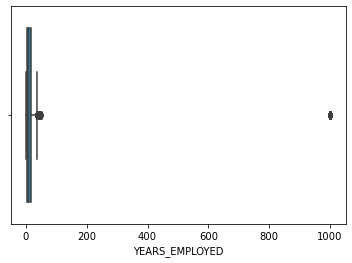

In [19]:
sns.boxplot(df_application['YEARS_EMPLOYED'])

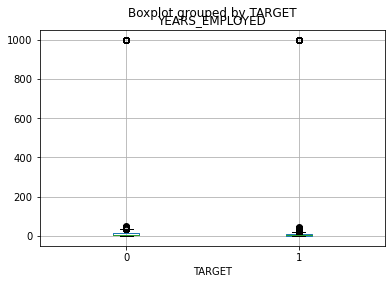

In [20]:
df_application.boxplot(column='YEARS_EMPLOYED', by='TARGET')

The anamoly in years worked is showing for both types of applicants that payed and did not repay the loan.

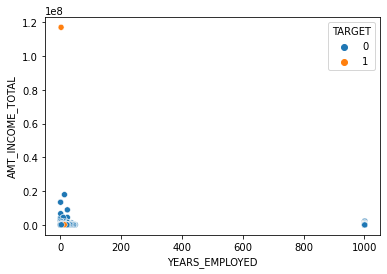

In [21]:
sns.scatterplot(data=df_application, x="YEARS_EMPLOYED", y="AMT_INCOME_TOTAL", hue="TARGET")

Most applicants with the skewed number of years worked did not default on their loan (target = 0).


In [22]:
print(df_application['YEARS_EMPLOYED'].quantile(0.10))
print(df_application['YEARS_EMPLOYED'].quantile(0.50))
print(df_application['YEARS_EMPLOYED'].quantile(0.90))
print(df_application['YEARS_EMPLOYED'].median())

1.1
6.1
1000.7
6.1


In [23]:
#replace YEARS_EMPLOYED=1000.7 with the median
df_application['YEARS_EMPLOYED'] = np.where(df_application['YEARS_EMPLOYED']==1000.7, 
                                            df_application['YEARS_EMPLOYED'].median(), df_application['YEARS_EMPLOYED'])
df_application['YEARS_EMPLOYED'].describe()

count   307511.00
mean         6.45
std          5.80
min          0.00
25%          2.60
50%          6.10
75%          7.60
max         49.10
Name: YEARS_EMPLOYED, dtype: float64

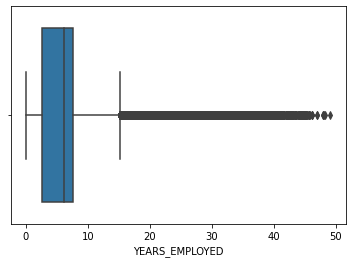

In [24]:
sns.boxplot(df_application['YEARS_EMPLOYED'])

## 1.6 Categorial Variables

In the following section I'll take a look at categorial variables, check the unique values and fill in missing values with the mode for the corresponding column. 

In [25]:
#check unique value in TARGET column 
#0 = debt paid
#1 = not paid
print('TARGET:')
print(df_application.TARGET.unique())

print('Contract Type:')
print(df_application.NAME_CONTRACT_TYPE.unique())

print('Gender:')
print(df_application.CODE_GENDER.unique())

print('Family Status:')
print(df_application['NAME_FAMILY_STATUS'].unique())

print('SUITE_TYPE:')
print(df_application['NAME_TYPE_SUITE'].unique())

print('Income Type:')
print(df_application['NAME_INCOME_TYPE'].unique())

print('Education:')
print(df_application['NAME_EDUCATION_TYPE'].unique())

print('House Type:')
print(df_application['NAME_HOUSING_TYPE'].unique())


TARGET:
[1 0]
Contract Type:
['Cash loans' 'Revolving loans']
Gender:
['M' 'F' 'XNA']
Family Status:
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
SUITE_TYPE:
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Income Type:
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Education:
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
House Type:
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


Gender contain "XNA" - we'll check how many observations contain this value.  Also SUITE_TYPE contain 'nan', we'll impute the mode into this column. 

In [26]:
print(df_application.CODE_GENDER.value_counts())
print(df_application.NAME_TYPE_SUITE.isna().value_counts())
print(df_application.OCCUPATION_TYPE.isna().value_counts())

#drop rows with gender = 'XNA'
df_application.drop(df_application[df_application['CODE_GENDER'] == 'XNA'].index, inplace=True)

#fill 'Unaccompanied' for nan values in NAME_TYPE_SUITE column 
df_application['NAME_TYPE_SUITE'].fillna(
    value=df_application.NAME_TYPE_SUITE.mode()[0], inplace=True)

#fill 'Laborers' for nan values in OCCUPATION_TYPE column 
df_application['OCCUPATION_TYPE'] = df_application['OCCUPATION_TYPE'].fillna(
    value=df_application.OCCUPATION_TYPE.mode()[0])

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
False    306219
True       1292
Name: NAME_TYPE_SUITE, dtype: int64
False    211120
True      96391
Name: OCCUPATION_TYPE, dtype: int64


In [27]:
#check categorial values have been updated 
print(df_application.CODE_GENDER.value_counts())
print(df_application.NAME_TYPE_SUITE.isna().value_counts())
print(df_application.OCCUPATION_TYPE.isna().value_counts())

F    202448
M    105059
Name: CODE_GENDER, dtype: int64
False    307507
Name: NAME_TYPE_SUITE, dtype: int64
False    307507
Name: OCCUPATION_TYPE, dtype: int64


There is 1292 observations containing nan, which represent only 0.42% of the dataset.  Those will be replaced by the most occuring category (mode). 

31.5% of the observations for "OCCUPATION_TYPE" are missing - we'll replace nan with the most occuring category (Laborers).

## 1.7 Impute missing values for the rest of the missing data

Check the count of missing values for the dataframe again to see what still needs to be cleaned.

For the next section I will impute the mean for the numerical NaN values shown in the table above.

Based on the research I did - some of the features that have missing values are required to apply and get approved for a loan, other values are not needed at all. In the next section I will impute the mean or median for those features that I found important.  And I will use SimpleImputer to fill in the rest of the (less important) features.

In [28]:
df_application['EXT_SOURCE_1'] = df_application['EXT_SOURCE_1'].fillna(value=df_application.EXT_SOURCE_1.mean())
df_application['EXT_SOURCE_2'] = df_application['EXT_SOURCE_2'].fillna(value=df_application.EXT_SOURCE_2.mean())
df_application['EXT_SOURCE_3'] = df_application['EXT_SOURCE_3'].fillna(value=df_application.EXT_SOURCE_3.mean())

df_application['OBS_30_CNT_SOCIAL_CIRCLE'] = df_application['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(
    value=df_application.OBS_30_CNT_SOCIAL_CIRCLE.mean())
df_application['DEF_30_CNT_SOCIAL_CIRCLE'] = df_application['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(
    value=df_application.DEF_30_CNT_SOCIAL_CIRCLE.mean())
df_application['OBS_60_CNT_SOCIAL_CIRCLE'] = df_application['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(
    value=df_application.OBS_60_CNT_SOCIAL_CIRCLE.mean())
df_application['DEF_60_CNT_SOCIAL_CIRCLE'] = df_application['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(
    value=df_application.DEF_60_CNT_SOCIAL_CIRCLE.mean())

df_application['AMT_REQ_CREDIT_BUREAU_YEAR'] = df_application['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(
    value=df_application.AMT_REQ_CREDIT_BUREAU_YEAR.median())

df_application['AMT_REQ_CREDIT_BUREAU_QRT'] = df_application['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(
    value=df_application.AMT_REQ_CREDIT_BUREAU_QRT.median())

df_application['AMT_REQ_CREDIT_BUREAU_MON'] = df_application['AMT_REQ_CREDIT_BUREAU_MON'].fillna(
    value=df_application.AMT_REQ_CREDIT_BUREAU_MON.median())

df_application['AMT_REQ_CREDIT_BUREAU_WEEK'] = df_application['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(
    value=df_application.AMT_REQ_CREDIT_BUREAU_WEEK.median())

df_application['AMT_REQ_CREDIT_BUREAU_DAY'] = df_application['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(
    value=df_application.AMT_REQ_CREDIT_BUREAU_DAY.median())

df_application['AMT_REQ_CREDIT_BUREAU_HOUR'] = df_application['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(
    value=df_application.AMT_REQ_CREDIT_BUREAU_HOUR.median())


## 1.8 Drop rows with missing values

In [29]:
countMissing(df_application).head(50)

,count,%
COMMONAREA_MEDI,214862,69.87
COMMONAREA_MODE,214862,69.87
COMMONAREA_AVG,214862,69.87
NONLIVINGAPARTMENTS_MEDI,213512,69.43
NONLIVINGAPARTMENTS_MODE,213512,69.43
NONLIVINGAPARTMENTS_AVG,213512,69.43
FONDKAPREMONT_MODE,210293,68.39
LIVINGAPARTMENTS_MODE,210197,68.36
LIVINGAPARTMENTS_MEDI,210197,68.36
LIVINGAPARTMENTS_AVG,210197,68.36


The remaining missing values represent a very small percentage of the dataframe and deleting those observations will not affect the data.

In [29]:
df_application.dropna(subset = ['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_FAM_MEMBERS','YEARS_PHONE_CHANGE'], inplace=True)

## 1.9 Export Data to CSV File

In [30]:
#export dataframes to CSV before droping columns 
file_name = 'data/application_clean.csv'
df_application.to_csv(file_name)   

The data frame has been exported to a CSV file.  Now I'll drop the features that don't seem necessary and then export the dataframe to another CSV file. 

There are 20 columns for FALG_DOCUMENT and most of them contain zeros - this columns indicates whether the applicant submitted a document(1) or not(0).  In order to reduce those columns, the sum will be taken across all those columns to indicate how many documents in total did the applicant submit.  This will allow for deleting 20 columns that contain zero values.

In [31]:
#sum all FLAG_DOCUMENT_ columns into one column
df_application['TOTAL_DOCUMENTS'] = df_application[['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
                                             'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                                             'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                                             'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                                             'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'
                                            ]].sum(axis=1)

In [32]:
#drop the following columns 
#Used my general knowledge to drop these columns - alot of the columns have 69% values missing
#having a brick house or a basement wouldn't affect the application - generally it's not information required when 
#applying
#will test the model without those features - if the score is not satisfactory will come back and add some
#of the features - and drop the rows with missing values. 
drop_col = ['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
           'APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG',
            'COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG',
            'LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG',
           'APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE',
           'COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE',
           'LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI',
            'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI',
            'ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI',
            'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE',
            'TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
            'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
            'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
            'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20',
            'FLAG_DOCUMENT_21', 'OWN_CAR_AGE']
df_application.drop(drop_col, axis=1, inplace=True)

df_application.shape

(307216, 53)

In [33]:
#export dataframes to CSV with reduced columns 
file_name = 'data/REDUCED_application_clean.csv'
df_application.to_csv(file_name)   


## 2.0 Add Burea Data to the Application Dataframe

In [34]:
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.00,-153.00,nan,0,91323.00,0.00,nan,0.00,Consumer credit,-131,nan
1,215354,5714463,Active,currency 1,-208,0,1075.00,nan,nan,0,225000.00,171342.00,nan,0.00,Credit card,-20,nan
2,215354,5714464,Active,currency 1,-203,0,528.00,nan,nan,0,464323.50,nan,nan,0.00,Consumer credit,-16,nan
3,215354,5714465,Active,currency 1,-203,0,nan,nan,nan,0,90000.00,nan,nan,0.00,Credit card,-16,nan
4,215354,5714466,Active,currency 1,-629,0,1197.00,nan,77674.50,0,2700000.00,nan,nan,0.00,Consumer credit,-21,nan


In [35]:
df_bureau.CREDIT_ACTIVE.unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [36]:
df_bureau.CREDIT_CURRENCY.unique()

array(['currency 1', 'currency 2', 'currency 4', 'currency 3'],
      dtype=object)

In [1]:
#count missing values in each column and sort them
missing = pd.concat([df_bureau.isnull().sum(), 100 * df_bureau.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

NameError: name 'pd' is not defined

In [38]:
df_bureau.CREDIT_TYPE.unique()

array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
       'Microloan', 'Loan for working capital replenishment',
       'Loan for business development', 'Real estate loan',
       'Unknown type of loan', 'Another type of loan',
       'Cash loan (non-earmarked)', 'Loan for the purchase of equipment',
       'Mobile operator loan', 'Interbank credit',
       'Loan for purchase of shares (margin lending)'], dtype=object)

# 2. Exploratory Data Analysis

In [39]:
#add credit duration info to df_bureau
df_bureau['CREDIT_LENGTH'] = -df_bureau['DAYS_CREDIT'] + df_bureau['DAYS_CREDIT_ENDDATE']   #length of credit in days (start date - Scheduled enddate)
df_bureau['CLOSED_DATE_DIFF'] = df_bureau['DAYS_CREDIT_ENDDATE'] - df_bureau['DAYS_ENDDATE_FACT'] #length of credit based on when it actually ended
df_bureau['CREDIT_DEBT_DIFF'] = df_bureau['AMT_CREDIT_SUM'] - df_bureau['AMT_CREDIT_SUM_DEBT'] #how much credit is untilized, only for active 
df_bureau['DEBT_PERCENTAGE'] = df_bureau['AMT_CREDIT_SUM_DEBT'] / df_bureau['AMT_CREDIT_SUM']

In [40]:
#aggregate active bureau rows for each 'SK_ID_CURR' the goal is to end up with one row summarizing all their 
#active loans 
#df_b_active = df_bureau[df_bureau['CREDIT_ACTIVE'] == 'Active']
        #for difference in closing date - create two columns, one for if they closed on time or earlier than schduled
        #another column for late past end date
        #need to calc credit utlization for active loans only
        #sum(AMT_CREDIT_SUM_DEBT)/sum(AMT_CREDIT_SUM)
        
        
        #average of monthly balances for active credits only
        ##total # of ddp 30 or whatever defaults
#get active bureau rows to perform aggregations and merge to df_application
active = df_bureau[df_bureau['CREDIT_ACTIVE'] == 'Active']
active_agg = active.groupby(['SK_ID_CURR']).agg(
    {
        'CREDIT_ACTIVE':"count",
        'AMT_CREDIT_SUM': [max, sum, 'mean'],
        'DAYS_CREDIT': [min, max, "mean"],
        'DAYS_CREDIT_ENDDATE': [min,max],
        'DEBT_PERCENTAGE': [max, "mean"],
        'CREDIT_DEBT_DIFF': ["mean"],
        'AMT_CREDIT_SUM_OVERDUE': [max, 'mean'],
        'DAYS_CREDIT_ENDDATE': [max],
        'AMT_CREDIT_MAX_OVERDUE': [sum, max],
        'CNT_CREDIT_PROLONG': ["mean"],
        'DAYS_CREDIT_UPDATE': [max],
        'AMT_CREDIT_SUM_DEBT': [sum]
        
    }
)
active_agg.columns = ["_ACTIVE_".join(col).upper() for col in active_agg.columns.ravel()]

#merge to df_application
df = df_application.join(active_agg, how='left', on='SK_ID_CURR')

In [41]:
del active, active_agg; gc.collect()

79

In [42]:
#aggregate closed loans from bureau df
#the goal is to summarize all closed loans in to 1 row then merge to df 
closed = df_bureau[df_bureau['CREDIT_ACTIVE'] == 'Closed']

closed_agg = closed.groupby(['SK_ID_CURR']).agg({
    'CREDIT_ACTIVE':"count",
    'AMT_CREDIT_SUM': [max, sum, 'mean'],
    'DAYS_CREDIT': [min, max, "mean"],
    'CREDIT_DEBT_DIFF': [min, max, "mean"],
    'AMT_CREDIT_SUM_OVERDUE': [max, 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': [sum, max],
    'DAYS_CREDIT_UPDATE': [max]
})

closed_agg.columns = ["_CLSD_".join(col).upper() for col in closed_agg.columns.ravel()]
#merge to df_application
df = df.join(closed_agg, how='left', on='SK_ID_CURR')

In [43]:
del closed, closed_agg; gc.collect()

45

In [44]:
#add "CREDIT_UTIL_ACTIVE" to calculate active overall loans utlization for each applicant
df['CREDIT_UTIL_ACTIVE'] = df['AMT_CREDIT_SUM_DEBT_ACTIVE_SUM']/df['AMT_CREDIT_SUM_ACTIVE_SUM']

In [45]:
df_bureau.CREDIT_ACTIVE.unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [46]:
#aggregate loans with 'Sold' CREDIT_ACTIVE status
sold = df_bureau[df_bureau['CREDIT_ACTIVE'] == 'Sold']

sold_agg = sold.groupby(['SK_ID_CURR']).agg({
    'CREDIT_ACTIVE':"count",
    'AMT_CREDIT_SUM': [max, sum, 'mean'],
    'DAYS_CREDIT': [min, max, "mean"],
    'CREDIT_DEBT_DIFF': [min, max, "mean"],
    'AMT_CREDIT_SUM_OVERDUE': [max, 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': [sum, max],
    'DAYS_CREDIT_UPDATE': [max]
})

sold_agg.columns = ["_SOLD_".join(col).upper() for col in sold_agg.columns.ravel()]
#merge to df_application
df = df.join(sold_agg, how='left', on='SK_ID_CURR')

In [47]:
del sold, sold_agg; gc.collect()

45

In [48]:
#aggregate loans with 'Sold' CREDIT_ACTIVE status
bad = df_bureau[df_bureau['CREDIT_ACTIVE'] == 'Bad debt']

bad_agg = bad.groupby(['SK_ID_CURR']).agg({
    'CREDIT_ACTIVE':"count",
    'AMT_CREDIT_SUM': [max, sum, 'mean'],
    'DAYS_CREDIT': [min, max, "mean"],
    'CREDIT_DEBT_DIFF': [min, max, "mean"],
    'AMT_CREDIT_SUM_OVERDUE': [max, 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': [sum, max],
    'DAYS_CREDIT_UPDATE': [max]
})

bad_agg.columns = ["_BAD_DEBT_".join(col).upper() for col in bad_agg.columns.ravel()]
#merge to df_application
df = df.join(bad_agg, how='left', on='SK_ID_CURR')

In [49]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_DOCUMENTS,CREDIT_ACTIVE_ACTIVE_COUNT,AMT_CREDIT_SUM_ACTIVE_MAX,AMT_CREDIT_SUM_ACTIVE_SUM,AMT_CREDIT_SUM_ACTIVE_MEAN,DAYS_CREDIT_ACTIVE_MIN,DAYS_CREDIT_ACTIVE_MAX,DAYS_CREDIT_ACTIVE_MEAN,DAYS_CREDIT_ENDDATE_ACTIVE_MAX,DEBT_PERCENTAGE_ACTIVE_MAX,DEBT_PERCENTAGE_ACTIVE_MEAN,CREDIT_DEBT_DIFF_ACTIVE_MEAN,AMT_CREDIT_SUM_OVERDUE_ACTIVE_MAX,AMT_CREDIT_SUM_OVERDUE_ACTIVE_MEAN,AMT_CREDIT_MAX_OVERDUE_ACTIVE_SUM,AMT_CREDIT_MAX_OVERDUE_ACTIVE_MAX,CNT_CREDIT_PROLONG_ACTIVE_MEAN,DAYS_CREDIT_UPDATE_ACTIVE_MAX,AMT_CREDIT_SUM_DEBT_ACTIVE_SUM,CREDIT_ACTIVE_CLSD_COUNT,AMT_CREDIT_SUM_CLSD_MAX,AMT_CREDIT_SUM_CLSD_SUM,AMT_CREDIT_SUM_CLSD_MEAN,DAYS_CREDIT_CLSD_MIN,DAYS_CREDIT_CLSD_MAX,DAYS_CREDIT_CLSD_MEAN,CREDIT_DEBT_DIFF_CLSD_MIN,CREDIT_DEBT_DIFF_CLSD_MAX,CREDIT_DEBT_DIFF_CLSD_MEAN,AMT_CREDIT_SUM_OVERDUE_CLSD_MAX,AMT_CREDIT_SUM_OVERDUE_CLSD_MEAN,AMT_CREDIT_MAX_OVERDUE_CLSD_SUM,AMT_CREDIT_MAX_OVERDUE_CLSD_MAX,DAYS_CREDIT_UPDATE_CLSD_MAX,CREDIT_UTIL_ACTIVE,CREDIT_ACTIVE_SOLD_COUNT,AMT_CREDIT_SUM_SOLD_MAX,AMT_CREDIT_SUM_SOLD_SUM,AMT_CREDIT_SUM_SOLD_MEAN,DAYS_CREDIT_SOLD_MIN,DAYS_CREDIT_SOLD_MAX,DAYS_CREDIT_SOLD_MEAN,CREDIT_DEBT_DIFF_SOLD_MIN,CREDIT_DEBT_DIFF_SOLD_MAX,CREDIT_DEBT_DIFF_SOLD_MEAN,AMT_CREDIT_SUM_OVERDUE_SOLD_MAX,AMT_CREDIT_SUM_OVERDUE_SOLD_MEAN,AMT_CREDIT_MAX_OVERDUE_SOLD_SUM,AMT_CREDIT_MAX_OVERDUE_SOLD_MAX,DAYS_CREDIT_UPDATE_SOLD_MAX,CREDIT_ACTIVE_BAD_DEBT_COUNT,AMT_CREDIT_SUM_BAD_DEBT_MAX,AMT_CREDIT_SUM_BAD_DEBT_SUM,AMT_CREDIT_SUM_BAD_DEBT_MEAN,DAYS_CREDIT_BAD_DEBT_MIN,DAYS_CREDIT_BAD_DEBT_MAX,DAYS_CREDIT_BAD_DEBT_MEAN,CREDIT_DEBT_DIFF_BAD_DEBT_MIN,CREDIT_DEBT_DIFF_BAD_DEBT_MAX,CREDIT_DEBT_DIFF_BAD_DEBT_MEAN,AMT_CREDIT_SUM_OVERDUE_BAD_DEBT_MAX,AMT_CREDIT_SUM_OVERDUE_BAD_DEBT_MEAN,AMT_CREDIT_MAX_OVERDUE_BAD_DEBT_SUM,AMT_CREDIT_MAX_OVERDUE_BAD_DEBT_MAX,DAYS_CREDIT_UPDATE_BAD_DEBT_MAX
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,25,1.70,10.00,5.80,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,2.00,2.00,2.00,2.00,3.10,0.00,0.00,0.00,0.00,0.00,1.00,1,2.00,450000.00,481988.57,240994.28,-1042.00,-103.00,-572.50,780.00,0.55,0.27,118103.78,0.00,0.00,40.50,40.50,0.00,-7.00,245781.00,6.00,135000.00,383067.00,63844.50,-1437.00,-476.00,-974.50,0.00,135000.00,85245.00,0.00,0.00,8364.65,5043.65,-34.00,0.51,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,45,3.30,3.20,0.80,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,School,0.31,0.62,0.51,1.00,0.00,1.00,0.00,2.30,0.00,0.00,0.00,0.00,0.00,0.00,1,1.00,810000.00,810000.00,810000.00,-606.00,-606.00,-606.00,1216.00,0.00,0.00,810000.00,0.00,0.00,0.00,0.00,0.00,-43.00,0.00,3.00,112500.00,207400.50,69133.50,-2586.00,-775.00,-1665.67,22248.00,112500.00,69133.50,0.00,0.00,0.00,0.00,-540.

In [50]:
#count missing values in each column and sort them
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
AMT_CREDIT_MAX_OVERDUE_BAD_DEBT_MAX,307202,100.00
CREDIT_DEBT_DIFF_BAD_DEBT_MEAN,307202,100.00
CREDIT_DEBT_DIFF_BAD_DEBT_MAX,307202,100.00
CREDIT_DEBT_DIFF_BAD_DEBT_MIN,307202,100.00
DAYS_CREDIT_UPDATE_BAD_DEBT_MAX,307196,99.99
DAYS_CREDIT_BAD_DEBT_MAX,307196,99.99
CREDIT_ACTIVE_BAD_DEBT_COUNT,307196,99.99
AMT_CREDIT_SUM_BAD_DEBT_MAX,307196,99.99
AMT_CREDIT_SUM_BAD_DEBT_SUM,307196,99.99
DAYS_CREDIT_BAD_DEBT_MIN,307196,99.99


In [51]:
#drop the newly created columns that are 100% Null
df.drop(['AMT_CREDIT_MAX_OVERDUE_BAD_DEBT_MAX', 'CREDIT_DEBT_DIFF_BAD_DEBT_MEAN', 'CREDIT_DEBT_DIFF_BAD_DEBT_MAX',
        'CREDIT_DEBT_DIFF_BAD_DEBT_MIN','DAYS_CREDIT_UPDATE_BAD_DEBT_MAX','DAYS_CREDIT_BAD_DEBT_MAX',
        'CREDIT_ACTIVE_BAD_DEBT_COUNT', 'AMT_CREDIT_SUM_BAD_DEBT_MAX', 'AMT_CREDIT_SUM_BAD_DEBT_SUM',
        'DAYS_CREDIT_BAD_DEBT_MIN', 'AMT_CREDIT_SUM_BAD_DEBT_MEAN', 'DAYS_CREDIT_BAD_DEBT_MEAN',
        'AMT_CREDIT_SUM_OVERDUE_BAD_DEBT_MAX','AMT_CREDIT_SUM_OVERDUE_BAD_DEBT_MEAN','AMT_CREDIT_MAX_OVERDUE_BAD_DEBT_SUM',
        'AMT_CREDIT_MAX_OVERDUE_SOLD_MAX','CREDIT_DEBT_DIFF_SOLD_MEAN','CREDIT_DEBT_DIFF_SOLD_MAX',
        'CREDIT_DEBT_DIFF_SOLD_MIN','DAYS_CREDIT_SOLD_MAX', 'CREDIT_ACTIVE_SOLD_COUNT',
        'AMT_CREDIT_SUM_SOLD_MAX', 'AMT_CREDIT_SUM_SOLD_SUM','AMT_CREDIT_SUM_SOLD_MEAN',
        'DAYS_CREDIT_SOLD_MIN','DAYS_CREDIT_SOLD_MEAN','AMT_CREDIT_SUM_OVERDUE_SOLD_MEAN',
        'AMT_CREDIT_MAX_OVERDUE_SOLD_SUM','DAYS_CREDIT_UPDATE_SOLD_MAX','AMT_CREDIT_SUM_OVERDUE_SOLD_MAX'
        ], axis=1, inplace=True)

In [52]:
file_name = 'data/application_bureau.csv'
df.to_csv(file_name)